### Laboratorium 3

In [23]:
using DataFrames
using Plots
using CSV
using Statistics
using Polynomials

In [2]:
# Julia --> column-major
# C ------> row-major

In [3]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [4]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [5]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall

#kompilacja
naive_multiplication(Asmall,Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [13]:
A=rand(1000,1000);
B=rand(1000,1000);

println(@elapsed naive_multiplication(A,B))
println(@elapsed better_multiplication(A,B))
println(@elapsed A*B)

3.427700423
1.556383923
0.124036644


In [7]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
using Polynomials
xs = 0:10; ys = map(x->exp(x), xs)
fit1=polyfit(xs, ys,3)


Poly(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [8]:
# obliczanie wartosci wielomianu 
fit1(1)

836.4071935534389

In [9]:
# obliczanie wartosci wielomianu (drugi sposób)
polyval(fit1, 1)

836.4071935534389

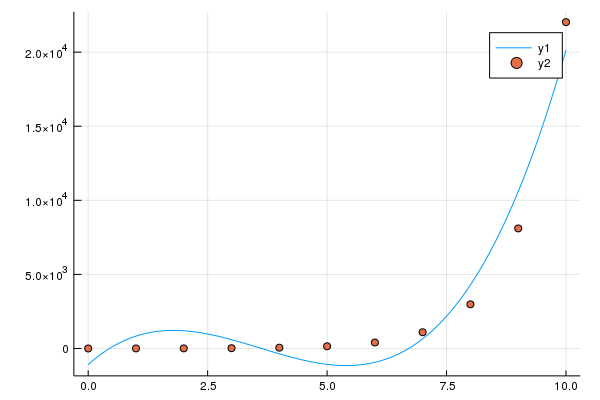

In [18]:
using Plots
# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=0:0.1:10
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit1, xd), fmt = :png)

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys)

### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.
 
2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

3.Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 


### Zadanie 1

In [26]:
using DataFrames
df = DataFrame(size = Int[], method = String[], time = Float64[])

for j = 1:5
    for i = 1:10
        s = i * 100
        A = rand(s,s)
        B = rand(s,s)

        t = @elapsed naive_multiplication(A,B)
        push!(df, [s, "naive", t])

        t = @elapsed better_multiplication(A,B)
        push!(df, [s, "better", t])

        t = @elapsed A*B
        push!(df, [s, "blas", t])
    end
end

df

,size,method,time
,Int64,String,Float64
1,100,naive,0.00363302
2,100,better,0.00179431
3,100,blas,0.000146601
4,200,naive,0.0496394
5,200,better,0.0134397
6,200,blas,0.0891892
7,300,naive,0.256455
8,300,better,0.0458287
9,300,blas,0.000869804


In [30]:
df_julia = by(df, [1,2]) do grouped
    DataFrame(time_mean = mean(grouped[3]), time_std = std(grouped[3]))
end

,size,method,time_mean,time_std
,Int64,String,Float64,Float64
1,100,naive,0.00346649,0.000114017
2,100,better,0.00172175,5.78732e-5
3,100,blas,0.0169998,0.0377667
4,200,naive,0.137016,0.0657533
5,200,better,0.0272271,0.0319702
6,200,blas,0.0181667,0.0397028
7,300,naive,0.250107,0.00702926
8,300,better,0.0494758,0.0021109
9,300,blas,0.000834304,0.000183377


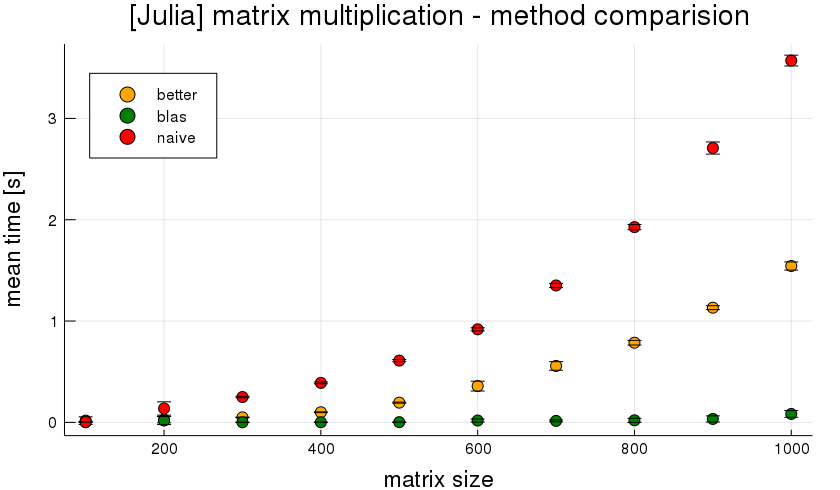

In [56]:
plot1 = scatter(df_julia[:size], df_julia[:time_mean], group = df_julia[:method], 
    layout = 1, color = [:orange :green :red], 
    yerr = df_julia[:time_std], dpi = 140, size = (600, 350),
    legend = :topleft, xlabel = "matrix size", ylabel = "mean time [s]",
    title = "[Julia] matrix multiplication - method comparision", fmt = :png)

### Zadanie 2

In [ ]:
# napisać analogiczne algorytmy w C i pomierzyć czasy

### Zadanie 3

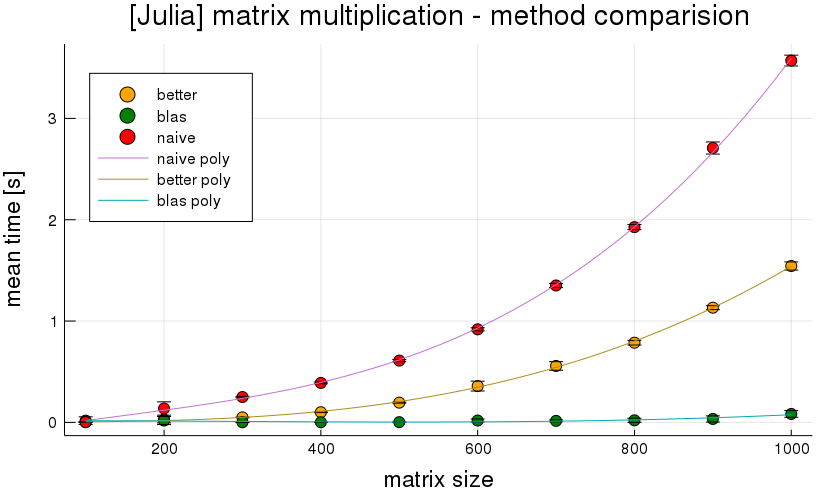

In [57]:
step = 100:20:1000
plot1 = scatter(df_julia[:size], df_julia[:time_mean], group = df_julia[:method], 
    layout = 1, color = [:orange :green :red], 
    yerr = df_julia[:time_std], dpi = 140, size = (600, 350),
    legend = :topleft, xlabel = "matrix size", ylabel = "mean time [s]",
    title = "[Julia] matrix multiplication - method comparision", fmt = :png)

naive = groupby(df_julia,2)[1]
better = groupby(df_julia,2)[2]
blas = groupby(df_julia,2)[3]

fit_naive = polyval(polyfit(naive[1], naive[3], 3), step)
fit_better = polyval(polyfit(better[1], better[3], 3), step)
fit_blas = polyval(polyfit(blas[1], blas[3], 3), step)

plot!(step, fit_naive, label = "naive poly")
plot!(step, fit_better, label = "better poly")
plot!(step, fit_blas, label = "blas poly")

### Zadanie 4

In [ ]:
# C i Julia na jednym wykresie, porównanie